<a href="https://colab.research.google.com/github/nidhiyadav12345/iot-pest-detection-system/blob/main/pest_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install kagglehub --quiet
import kagglehub, os, shutil


In [6]:
path1 = kagglehub.dataset_download("vencerlanz09/agricultural-pests-image-dataset")
path2 = kagglehub.dataset_download("leonidkulyk/ip102-yolov5")
path3 = kagglehub.dataset_download("samitha96/coconutdiseases")
path4 = kagglehub.dataset_download("tarundalal/dangerous-insects-dataset")
print("all datasets are downloaded sucessfully")

100%|██████████| 767M/767M [00:09<00:00, 87.9MB/s]

Extracting files...


100%|██████████| 1.57G/1.57G [00:16<00:00, 99.4MB/s]

Extracting files...


100%|██████████| 447M/447M [00:12<00:00, 37.6MB/s]

Extracting files...


all datasets are downloaded sucessfully


In [9]:
combined_path = "/content/all_insects"
os.makedirs(combined_path, exist_ok=True)

def merge_datasets(src_path, dest_path):
    for root, dirs, files in os.walk(src_path):
        for d in dirs:
            src_dir = os.path.join(root, d)
            dest_dir = os.path.join(dest_path, d)
            os.makedirs(dest_dir, exist_ok=True)
            for f in os.listdir(src_dir):
                src_file = os.path.join(src_dir, f)
                dest_file = os.path.join(dest_dir, f)
                if os.path.isfile(src_file):
                    shutil.copy(src_file, dest_file)

merge_datasets(path1, combined_path)
merge_datasets(path2, combined_path)
merge_datasets(path3, combined_path)
merge_datasets(path4, combined_path)

print("✅ All datasets merged into:", combined_path)
!ls "$combined_path"

✅ All datasets merged into: /content/all_insects
'Africanized Honey Bees (Killer Bees)'	 grasshopper
 ants					 Healthy_Leaves
 Aphids					 images
 Armyworms				 IP102_YOLOv5
 bees					 labels
 beetle					 moth
'Brown Marmorated Stink Bugs'		 slug
'Cabbage Loopers'			 snail
 catterpillar				'Spider Mites'
 CCI_Caterpillars			 Thrips
 CCI_Leaflets				'Tomato Hornworms'
'Citrus Canker'				 train
'Colorado Potato Beetles'		 val
'Corn Borers'				 wasp
'Corn Earworms'				 WCLWD_DryingofLeaflets
 earthworms				 WCLWD_Flaccidity
 earwig					 WCLWD_Yellowing
'Fall Armyworms'			 weevil
 farm_insects				'Western Corn Rootworms'
'Fruit Flies'


In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

print("✅ TensorFlow version:", tf.__version__)


✅ TensorFlow version: 2.19.0


In [11]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,           # normalize pixels
    validation_split=0.2,     # 80% train, 20% validation
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2
)

train_data = datagen.flow_from_directory(
    combined_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='training'
)

val_data = datagen.flow_from_directory(
    combined_path,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    subset='validation'
)

print("✅ Training and validation sets ready!")


Found 24964 images belonging to 39 classes.
Found 6223 images belonging to 39 classes.
✅ Training and validation sets ready!


In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(train_data.num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 39)             │         5,031 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,309,671 (12.63 MB)

 Trainable params: 3,309,671 (12.63 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=10
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
  9/781 ━━━━━━━━━━━━━━━━━━━━ 2:35 202ms/step - accuracy: 0.4125 - loss: 2.8788

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


781/781 ━━━━━━━━━━━━━━━━━━━━ 250s 311ms/step - accuracy: 0.6032 - loss: 1.8926 - val_accuracy: 0.6796 - val_loss: 1.5527
Epoch 2/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 219s 280ms/step - accuracy: 0.6886 - loss: 1.3820 - val_accuracy: 0.6926 - val_loss: 1.4315
Epoch 3/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 211s 271ms/step - accuracy: 0.7090 - loss: 1.2576 - val_accuracy: 0.7037 - val_loss: 1.3632
Epoch 4/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 211s 270ms/step - accuracy: 0.7088 - loss: 1.2130 - val_accuracy: 0.7112 - val_loss: 1.3392
Epoch 5/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 210s 269ms/step - accuracy: 0.7174 - loss: 1.1549 - val_accuracy: 0.7130 - val_loss: 1.2626
Epoch 6/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 211s 270ms/step - accuracy: 0.7290 - loss: 1.0887 - val_accuracy: 0.6720 - val_loss: 1.2773
Epoch 7/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 210s 269ms/step - accuracy: 0.7313 - loss: 1.0658 - val_accuracy: 0.7037 - val_loss: 1.2124
Epoch 8/10
781/781 ━━━━━━━━━━━━━━━━━━━━ 209s 268ms/step - accuracy: 0.7450 - loss: 1.01

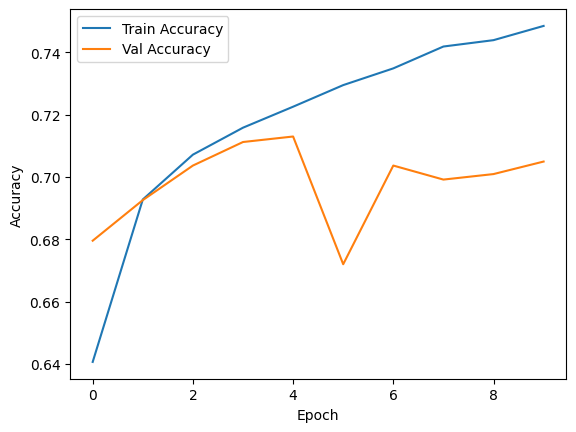

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [15]:
loss, acc = model.evaluate(val_data)
print(f"✅ Final Validation Accuracy: {acc*100:.2f}%")


195/195 ━━━━━━━━━━━━━━━━━━━━ 42s 214ms/step - accuracy: 0.7027 - loss: 1.1795
✅ Final Validation Accuracy: 69.90%


In [16]:
from google.colab import files
uploaded = files.upload()


Saving Screenshot 2025-11-07 023640.png to Screenshot 2025-11-07 023640.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step
🔍 Predicted Class: train


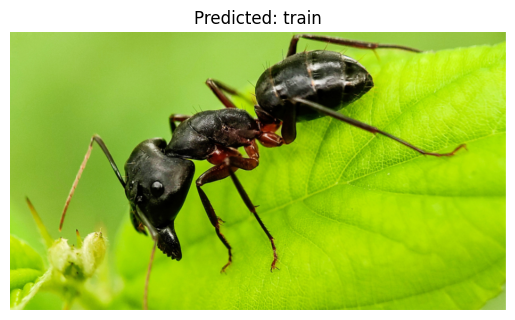

In [17]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = list(uploaded.keys())[0]
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)

pred = model.predict(img_array)
classes = list(train_data.class_indices.keys())

print("🔍 Predicted Class:", classes[np.argmax(pred)])

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted: {classes[np.argmax(pred)]}")
plt.axis('off')
plt.show()


In [18]:
print("Classes found by ImageDataGenerator:")
print(train_data.class_indices)


Classes found by ImageDataGenerator:
{'Africanized Honey Bees (Killer Bees)': 0, 'Aphids': 1, 'Armyworms': 2, 'Brown Marmorated Stink Bugs': 3, 'CCI_Caterpillars': 4, 'CCI_Leaflets': 5, 'Cabbage Loopers': 6, 'Citrus Canker': 7, 'Colorado Potato Beetles': 8, 'Corn Borers': 9, 'Corn Earworms': 10, 'Fall Armyworms': 11, 'Fruit Flies': 12, 'Healthy_Leaves': 13, 'IP102_YOLOv5': 14, 'Spider Mites': 15, 'Thrips': 16, 'Tomato Hornworms': 17, 'WCLWD_DryingofLeaflets': 18, 'WCLWD_Flaccidity': 19, 'WCLWD_Yellowing': 20, 'Western Corn Rootworms': 21, 'ants': 22, 'bees': 23, 'beetle': 24, 'catterpillar': 25, 'earthworms': 26, 'earwig': 27, 'farm_insects': 28, 'grasshopper': 29, 'images': 30, 'labels': 31, 'moth': 32, 'slug': 33, 'snail': 34, 'train': 35, 'val': 36, 'wasp': 37, 'weevil': 38}
